<a href="https://colab.research.google.com/github/Sravanbunny2002/Text-Classification-on-consumer-complaint-dataset/blob/main/Consumer_complaint_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement 


*   Perform a Text Classification on consumer complaint dataset










1)Importing all the required libraries.


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split, cross_val_score
import os
from itertools import cycle
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, linear_model, metrics, datasets, multiclass, svm
import seaborn as sns
import numpy.random as nr

Importing The Dataset from files


In [52]:
from google.colab import files
uploaded=files.upload()

Saving Consumer_Complaints.csv to Consumer_Complaints (1).csv


In [53]:
Data = pd.read_csv('Consumer_Complaints.csv', encoding='latin-1')

In [54]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', -1)

<ipython-input-54-defa6ba9722b>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


#Data Pre-Processing

In [55]:
Data

,Date_received,Product,Sub_product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP code,Tags,Consumer_consent_provided?,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response?,Consumer_disputed?,Complaint_ID
0,27-04-2023,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19145.0,NaN,NaN,Web,27-04-2023,In progress,Yes,NaN,6896026
1,27-04-2023,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with a credit reporting company's investigation into an existing problem,Their investigation did not fix an error on your report,NaN,NaN,"EQUIFAX, INC.",PA,19111.0,NaN,NaN,Web,27-04-2023,In progress,Yes,NaN,6896030
2,27-04-2023,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,78725.0,NaN,NaN,Web,27-04-2023,In progress,Yes,NaN,6896035
3,27-04-2023,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",NY,11233.0,NaN,NaN,Web,27-04-2023,In progress,Yes,NaN,6896060
4,27-04-2023,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't recognize,NaN,NaN,"EQUIFAX, INC.",OR,97219.0,NaN,NaN,Web,27-04-2023,In progress,Yes,NaN,6896096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,26-04-2023,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Report provided to employer without your written authorization,NaN,NaN,"EQUIFAX, INC.",IL,60624.0,NaN,NaN,Web,26-04-2023,In progress,Yes,NaN,6891444
3995,26-04-2023,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",NY,10451.0,NaN,NaN,Web,26-04-2023,In progress,Yes,NaN,6891448
3996,26-04-2023,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",MS,39272.0,NaN,NaN,Web,26-04-2023,In progress,Yes,NaN,6885708
3997,21-04-2023,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with a credit reporting company's investigation into an existing problem,Their investigation did not fix an error on your report,NaN,NaN,"EQUIFAX, INC.",FL,32808.0,NaN,NaN,Web,21-04-2023,In progress,Yes,NaN,6869860


In [56]:
Data['ZIP code']=Data['ZIP code'].astype(str)
print(Data.dtypes)

Date_received                   object
Product                         object
Sub_product                     object
Issue                           object
Sub-issue                       object
Consumer_complaint_narrative    object
Company_public_response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer_consent_provided?      object
Submitted_via                   object
Date_sent_to_company            object
Company_response_to_consumer    object
Timely_response?                object
Consumer_disputed?              object
Complaint_ID                    int64 
dtype: object


In [73]:
Data.dtypes

Product                         object
Consumer_complaint_narrative    object
dtype: object

In [58]:
pd.notnull(Data['Consumer_complaint_narrative']).value_counts()


False    3858
True     141 
Name: Consumer_complaint_narrative, dtype: int64

In [59]:
Data = Data[['Product','Consumer_complaint_narrative']]
Data = Data[pd.notnull(Data['Consumer_complaint_narrative'])]
Data

Product  \
112   Credit reporting, credit repair services, or other personal consumer reports   
116   Checking or savings account                                                    
160   Credit card or prepaid card                                                    
164   Mortgage                                                                       
178   Credit reporting, credit repair services, or other personal consumer reports   
...                                                                            ...   
3870  Credit reporting, credit repair services, or other personal consumer reports   
3875  Mortgage                                                                       
3914  Credit card or prepaid card                                                    
3942  Credit reporting, credit repair services, or other personal consumer reports   
3981  Checking or savings account                                                    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [60]:
Data.shape

(141, 2)

In [61]:
# check the distribution of complaint by category
Data.groupby('Product').Consumer_complaint_narrative.count()

Product
Checking or savings account                                                     17
Credit card or prepaid card                                                     12
Credit reporting, credit repair services, or other personal consumer reports    71
Debt collection                                                                 22
Money transfer, virtual currency, or money service                              2 
Mortgage                                                                        11
Payday loan, title loan, or personal loan                                       2 
Vehicle loan or lease                                                           4 
Name: Consumer_complaint_narrative, dtype: int64

#Splitting the data

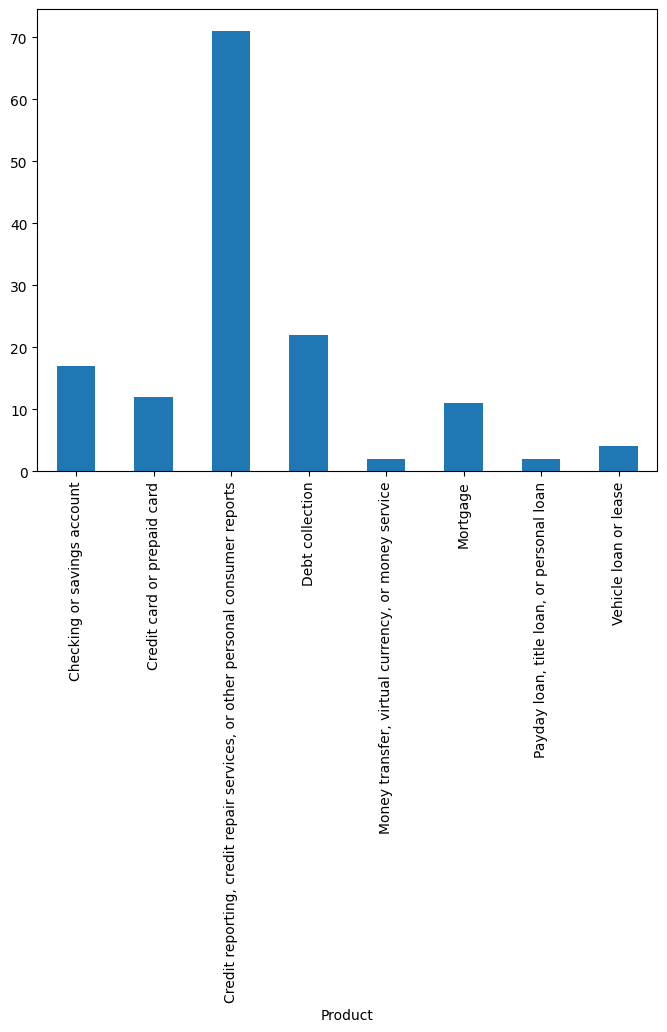

In [62]:
fig = plt.figure(figsize=(8,6))
Data.groupby('Product').Consumer_complaint_narrative.count().plot.bar()
plt.show()

#Converting Text to Features
The process of transforming unprocessed text data into a structured format that can be understood by machine learning models is known as text feature engineering. The accuracy and performance of machine learning and deep learning algorithms greatly depend on the effectiveness of feature engineering techniques used in this process.

#TF_IDF Vectorizer
TF-IDF is a widely used feature engineering technique for processing textual data in machine learning and data science.

Term frequency (TF) measures the importance of a word in a sentence by computing the ratio of its frequency to the length of the sentence. This is necessary because a word appearing multiple times in a longer sentence may not be as important as it would be in a shorter one.

Inverse Document Frequency (IDF) measures the rareness of a term by calculating the logarithm of the ratio of total documents in a corpus to the number of documents that contain the term. This is useful for distinguishing frequently occurring words, such as "a" and "the", from more specific and rare words that can carry greater semantic significance.

By combining the TF and IDF, TF-IDF addresses the limitations of each approach and provides a simple yet powerful way to extract meaningful information from textual data for effective predictions and information retrieval.

In [63]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', max_features=5000)    # default {max_df=1.0(float) so its proportion of word contain in all documents,
# simply if a words contain in all the document it is 1.0}, {min_df=1(int) so iteger directly denotes count of words in a document shows atleast 1 word contains in a documents then only it is consider}
tfidf_vect.fit(Data['Consumer_complaint_narrative'])
Features = tfidf_vect.transform(Data['Consumer_complaint_narrative'])

encoder = preprocessing.LabelEncoder()
Labels1 = encoder.fit_transform(Data['Product'])

# Binarize the output
#Labels = np.array(preprocessing.label_binarize(Labels, classes=[0,1,2,3,4,5,6,7,8,9,10]))

In [64]:
print(Features[0], Labels1)

  (0, 2791)	0.08764925301318215
  (0, 2789)	0.01754475201057864
  (0, 2786)	0.01643163850211767
  (0, 2782)	0.5008934083091346
  (0, 2781)	0.020938474606274276
  (0, 2776)	0.03508950402115728
  (0, 2756)	0.045856733604269395
  (0, 2751)	0.03993406151452586
  (0, 2737)	0.042568558175993323
  (0, 2736)	0.028298786593903516
  (0, 2731)	0.012145311753720463
  (0, 2698)	0.008884914898581597
  (0, 2682)	0.018192767521831594
  (0, 2668)	0.025322647798042424
  (0, 2667)	0.02426041788385775
  (0, 2647)	0.028298786593903516
  (0, 2642)	0.028298786593903516
  (0, 2640)	0.020222049173811988
  (0, 2638)	0.09272987361614334
  (0, 2628)	0.025322647798042424
  (0, 2609)	0.028298786593903516
  (0, 2593)	0.01508113111869155
  (0, 2582)	0.016690620450118127
  (0, 2579)	0.026622712143320192
  (0, 2552)	0.025322647798042424
  :	:
  (0, 229)	0.026622712143320192
  (0, 226)	0.10347546226770538
  (0, 225)	0.017245910377950896
  (0, 218)	0.0145076060131829
  (0, 195)	0.03286327700423534
  (0, 192)	0.0242604178

In [65]:
train_x, valid_x,  train_y, valid_y = train_test_split(Data['Consumer_complaint_narrative'],Data['Product'])    # Default it will split 25 by 75% means

In [66]:
train_x

3705    I called USAA for a cashiers ' check on XXXX for deposit on a new home. They confirm that it was delivered, but I never received it. Since the funds were already taken out, I now have no money for the deposit for the apartment and will become virtually homeless as a single dad with two kid, all because USAA will not own up to their mistake. They will neither assist with check cancellation or reimbursement for the funds, as their policy states clauses that prevent them from assisting me in any manner. I had asked them if they can assist by providing me the money so that I can pay for the deposit ( and when they cancel the check, they can deposit it to themselves ), but they are not willing to come to any compromise on this situation. This is my last resort to find any type of resolution.                                                                                                                                                                                                   

In [67]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
print(train_y)

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', max_features=5000)    # default {max_df=1.0(float) so its proportion of word contain in all documents,
# simply if a words contain in all the document it is 1.0}, {min_df=1(int) so iteger directly denotes count of words in a document shows atleast 1 word contains in a documents then only it is consider}
tfidf_vect.fit(Data['Consumer_complaint_narrative'])
print(tfidf_vect.stop_words)
print(tfidf_vect.vocabulary_)
xtrain_tfidf = tfidf_vect.transform(train_x)
#print(xtrain_tfidf)
xvalid_tfidf = tfidf_vect.transform(valid_x)

[4 2 5 3 1 2 5 3 2 0 2 2 3 1 0 0 1 2 3 2 2 2 0 1 2 0 3 2 1 3 2 2 2 0 2 2 1
 3 2 2 2 0 2 5 3 4 1 2 7 3 3 3 2 2 0 5 2 2 0 5 2 2 2 2 2 2 5 2 2 2 2 2 2 7
 5 2 2 2 0 6 1 2 1 0 2 5 2 2 2 2 0 0 0 2 3 5 2 3 2 2 2 2 2 2 5]
None
{'identity': 1301, 'theft': 2466, 'xx': 2781, 'xxxxxxxx': 2786, 'xxxx': 2782, 'florida': 1101, 'experian': 1004, 'tx': 2579, 'pa': 1804, 're': 2016, 'last': 1458, '4': 91, 'of': 1738, 'social': 2333, 'security': 2248, 'number': 1725, 'to': 2520, 'whom': 2737, 'it': 1414, 'may': 1577, 'concern': 625, 'this': 2489, 'notice': 1715, 'is': 1407, 'inform': 1353, 'you': 2791, 'that': 2463, 'unlawfully': 2609, 'reported': 2128, 'fraudulent': 1129, 'accounts': 166, 'arose': 313, 'from': 1137, 'did': 812, 'not': 1710, 'verify': 2667, 'as': 317, 'required': 2143, 'by': 472, 'law': 1463, 'on': 1754, 'my': 1669, 'consumer': 650, 'report': 2127, '15': 18, 'usc': 2638, 'ss': 2358, '1681': 27, 'b': 369, 'c': 473, 'furnishing': 1155, 'reports': 2130, 'in': 1320, 'connection': 642, 'with'

In [68]:
help(TfidfVectorizer)

Help on class TfidfVectorizer in module sklearn.feature_extraction.text:

class TfidfVectorizer(CountVectorizer)
 |  TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
 |  
 |  Convert a collection of raw documents to a matrix of TF-IDF features.
 |  
 |  Equivalent to :class:`CountVectorizer` followed by
 |  :class:`TfidfTransformer`.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------
 |  input : {'filename', 'file', 'content'}, default='content'
 |      - If `'filename'`, the sequence passed as an argument to fit is
 |        expected to be a list of filenames that need reading to fetc

#Building a Model

In [69]:
print(xtrain_tfidf[0])

  (0, 2782)	0.026402450284902342
  (0, 2751)	0.059780664707343
  (0, 2744)	0.09476901798269824
  (0, 2741)	0.17646459871648054
  (0, 2727)	0.05882153290549351
  (0, 2716)	0.05172599675152219
  (0, 2698)	0.033251446156571156
  (0, 2685)	0.11474789468841527
  (0, 2637)	0.18953803596539648
  (0, 2625)	0.05799863976320406
  (0, 2580)	0.09963445789636391
  (0, 2578)	0.0775774303757679
  (0, 2520)	0.12292195493580725
  (0, 2489)	0.05718931864278156
  (0, 2482)	0.21967535975682495
  (0, 2471)	0.0907936641159944
  (0, 2470)	0.09885741521308829
  (0, 2468)	0.10109422143353944
  (0, 2465)	0.17087456663341163
  (0, 2463)	0.09309650434679896
  (0, 2438)	0.08195287033562491
  (0, 2369)	0.06149476378267074
  (0, 2332)	0.05644054277361928
  (0, 2330)	0.07965558119064688
  (0, 2325)	0.10590710090804577
  :	:
  (0, 636)	0.0907936641159944
  (0, 620)	0.11474789468841527
  (0, 586)	0.09963445789636391
  (0, 561)	0.11474789468841527
  (0, 537)	0.22180490909263462
  (0, 506)	0.11474789468841527
  (0, 487)	

In [70]:
model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)

In [71]:
model

LogisticRegression()

#Accuracy of the model

In [78]:

def accuracy():
    # checking accuracy
    accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf),valid_y)
    print("Accuracy: ",accuracy)
   

accuracy()

Accuracy:  0.5


In [77]:
#from sklearn.metrics import classification_report

# y_true and y_pred are your true and predicted target values
# labels should be a list of length 7 that specifies the names of your target classes
#report = classification_report(valid_y,model.predict(xvalid_tfidf), labels=["Customer Loan", "Mortgage", "Debt collection", "Credit card or prepaid card", "Credit reporting, credit repair services, or other personal consumer reports"])

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will pe

In [ ]:
def heat_conf():
    # confusion matrix
    conf_mat = metrics.confusion_matrix(valid_y,model.predict(xvalid_tfidf))
    print(conf_mat)
    # visualizing confusion matrix
    #category_id_df = Data[['product','category_id']].drop_duplicates().sort_values('category_id')
    #category_id_df
    fig, ax = plt.subplots(figsize=(10,6))
    sns.heatmap(conf_mat, annot=True,fmt='d',cmap='BuPu',xticklabels=Data['Product'].unique(),yticklabels=Data['Product'].unique())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
heat_conf()

In [80]:
category_id_df = pd.DataFrame()
category_id_df['category'] = Data['Product'].unique()
category_id_df['category_id'] = category_id_df.index.values

#print(category_id_df.index.values)
category_to_id = dict(category_id_df[['category_id','category']].values)
category_to_id

{0: 'Credit reporting, credit repair services, or other personal consumer reports',
 1: 'Checking or savings account',
 2: 'Credit card or prepaid card',
 3: 'Mortgage',
 4: 'Debt collection',
 5: 'Vehicle loan or lease',
 6: 'Payday loan, title loan, or personal loan',
 7: 'Money transfer, virtual currency, or money service'}

In [81]:
probabilities = model.predict_proba(xvalid_tfidf)
print(probabilities[:15,:])

[[0.0742694  0.04862627 0.71750523 0.07697025 0.01342959 0.04996745
  0.00693741 0.0122944 ]
 [0.13889325 0.09427565 0.42435238 0.18413253 0.02456547 0.10021191
  0.01087741 0.0226914 ]
 [0.12617096 0.10246578 0.4975705  0.12282892 0.02064342 0.09693023
  0.01062361 0.02276658]
 [0.04156082 0.02733231 0.8148828  0.05268795 0.00931612 0.03985496
  0.00503945 0.0093256 ]
 [0.15802984 0.09909074 0.36006893 0.14223371 0.02329926 0.1728645
  0.01349    0.03092303]
 [0.13492331 0.11981876 0.46890649 0.12158105 0.02088214 0.09899553
  0.01102646 0.02386626]
 [0.09414417 0.04684168 0.61306781 0.13859035 0.01509069 0.06833148
  0.00873388 0.01519993]
 [0.10171278 0.07526186 0.5563777  0.14008477 0.01852331 0.07977651
  0.01012665 0.01813642]
 [0.08994743 0.07056784 0.64095733 0.09787098 0.01555144 0.061679
  0.00839809 0.01502788]
 [0.10199856 0.06460983 0.54028862 0.15736019 0.01887692 0.08903143
  0.00946629 0.01836816]
 [0.04954959 0.033318   0.77220044 0.06777966 0.01001663 0.05013323
  0.0

In [82]:
y_score = model.decision_function(xvalid_tfidf)
print(y_score[:15,:])
predictions = model.predict(xvalid_tfidf)
print(predictions[:15])

[[ 0.54945326  0.12591813  2.81753441  0.58517315 -1.16078532  0.15312597
  -1.82131729 -1.24910229]
 [ 0.67577427  0.2882916   1.79263281  0.9577244  -1.05658944  0.3493556
  -1.87124363 -1.13594561]
 [ 0.64045566  0.43234673  2.01255511  0.61361036 -1.16978542  0.37680929
  -1.83410328 -1.07188845]
 [ 0.29344391 -0.12564453  3.26933035  0.53067288 -1.20196818  0.2515328
  -1.81641712 -1.20095012]
 [ 0.70816306  0.24141522  1.53167469  0.60285076 -1.206199    0.79788723
  -1.7526724  -0.92311957]
 [ 0.67365604  0.55492978  1.91935287  0.56953062 -1.1921562   0.3640242
  -1.83075274 -1.05858456]
 [ 0.59875878 -0.09929515  2.47240698  0.98545386 -1.23199029  0.27830193
  -1.77885858 -1.22477752]
 [ 0.53238135  0.23120188  2.23167575  0.85247615 -1.17074159  0.2894575
  -1.77460136 -1.19184968]
 [ 0.56092279  0.31827192  2.52466024  0.64534742 -1.19414955  0.18364082
  -1.81029841 -1.22839523]
 [ 0.53380229  0.07721015  2.20094706  0.96738096 -1.15321639  0.39783299
  -1.84341951 -1.1805

In [83]:
# Binarize the output
y = preprocessing.label_binarize(valid_y, classes=[0,1,2,3,4,5,6,7,8,9,10])
n_classes = y.shape[1]
y

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


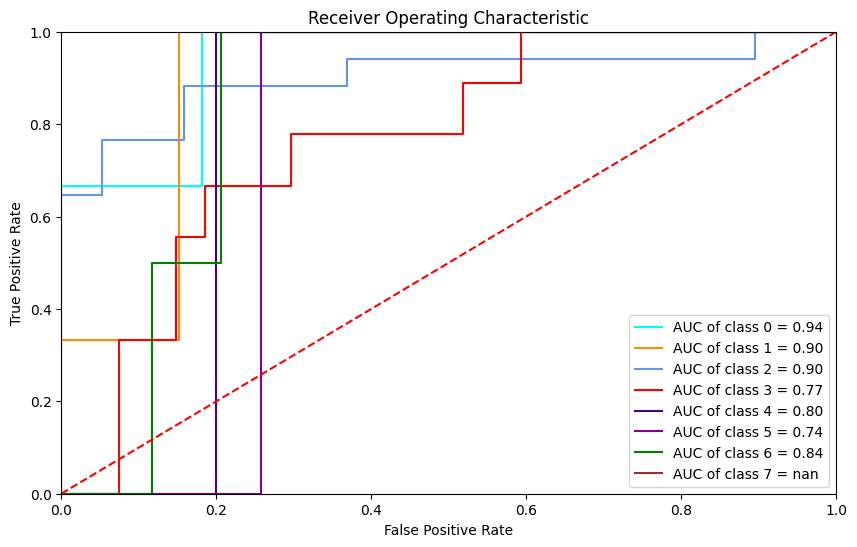

In [84]:
def plot_auc(labels, colours=['orange']):
    
    # Compute ROC curve and ROC area for each class
    n_classes = len(category_to_id)
    # print(n_classes)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC

    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y[:,i], y_score[:, i])
    #     print(fpr[i], tpr[i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(10,6))
    for i, color in zip(range(n_classes), colours):
        plt.plot(fpr[i], tpr[i], color = color, label = 'AUC of class {0} = {1:0.2f}'.format(i,roc_auc[i]))
        
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
 
colours = ['aqua', 'darkorange', 'cornflowerblue','r','indigo','darkmagenta','green','brown','olive','darkcyan','violet']
plot_auc(y, colours)    # in place of probabilities we can put y_score of decision function as well. will get a same result.

#Compute a weighted model
In the given situation, misclassifying a customer's categorical product into a different category can result in high costs for the bank and increase follow-up time for customers. However, the first model's results are not up to the mark due to two reasons: class imbalance in the label has biased the model's training, and no weighting has been applied to accurately classify particular product category data.

One approach to address these problems is to weight the classes while computing the logistic regression model. The code provided in the cell adds a class_weight parameter to the LogisticRegression function call. The weights assigned are 5 for class 5 and 10 for class 7, but these can be customized based on the specific problem. The modified code helps in achieving better results by addressing the class imbalance and giving more importance to correctly classifying the particular product categories.

In [92]:
 result_metric = metrics.precision_recall_fscore_support(train_y,model.predict(xtrain_tfidf))
 num_cases = result_metric[3][:]
 print(num_cases.sort())
 print(sum(num_cases))
 label_dic = {i:j for i,j in zip(num_cases,range(len(num_cases)))}
 print(label_dic)
 perc = []
 for i in range(len(num_cases)):
     perc.append(num_cases[i]/sum(num_cases))
 perc_rev = sorted(perc,reverse=True)
 num_cases.sort()
 print(perc_rev)
 class_weights = {label_dic[i]:j for i,j in zip(num_cases,perc_rev)}

print(class_weights)

None
105
{1: 0, 2: 2, 9: 3, 10: 4, 13: 5, 14: 6, 54: 7}
[0.5142857142857142, 0.13333333333333333, 0.12380952380952381, 0.09523809523809523, 0.08571428571428572, 0.01904761904761905, 0.01904761904761905, 0.009523809523809525]
{0: 0.5142857142857142, 2: 0.12380952380952381, 3: 0.09523809523809523, 4: 0.08571428571428572, 5: 0.01904761904761905, 6: 0.01904761904761905, 7: 0.009523809523809525}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
from collections import Counter
Counter(train_y)

Counter({4: 2, 2: 54, 5: 10, 3: 13, 1: 9, 0: 14, 7: 2, 6: 1})

In [90]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [113]:
model = linear_model.LogisticRegression(class_weight = {4:3.0, 0:3, 6:3.0, 3:20}).fit(xtrain_tfidf, train_y)
model

LogisticRegression(class_weight={0: 3, 3: 20, 4: 3.0, 6: 3.0})

Accuracy:  0.6666666666666666
[[ 2  0  1  0  0  0  0]
 [ 0  0  1  2  0  0  0]
 [ 0  0 13  4  0  0  0]
 [ 0  0  0  9  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]]


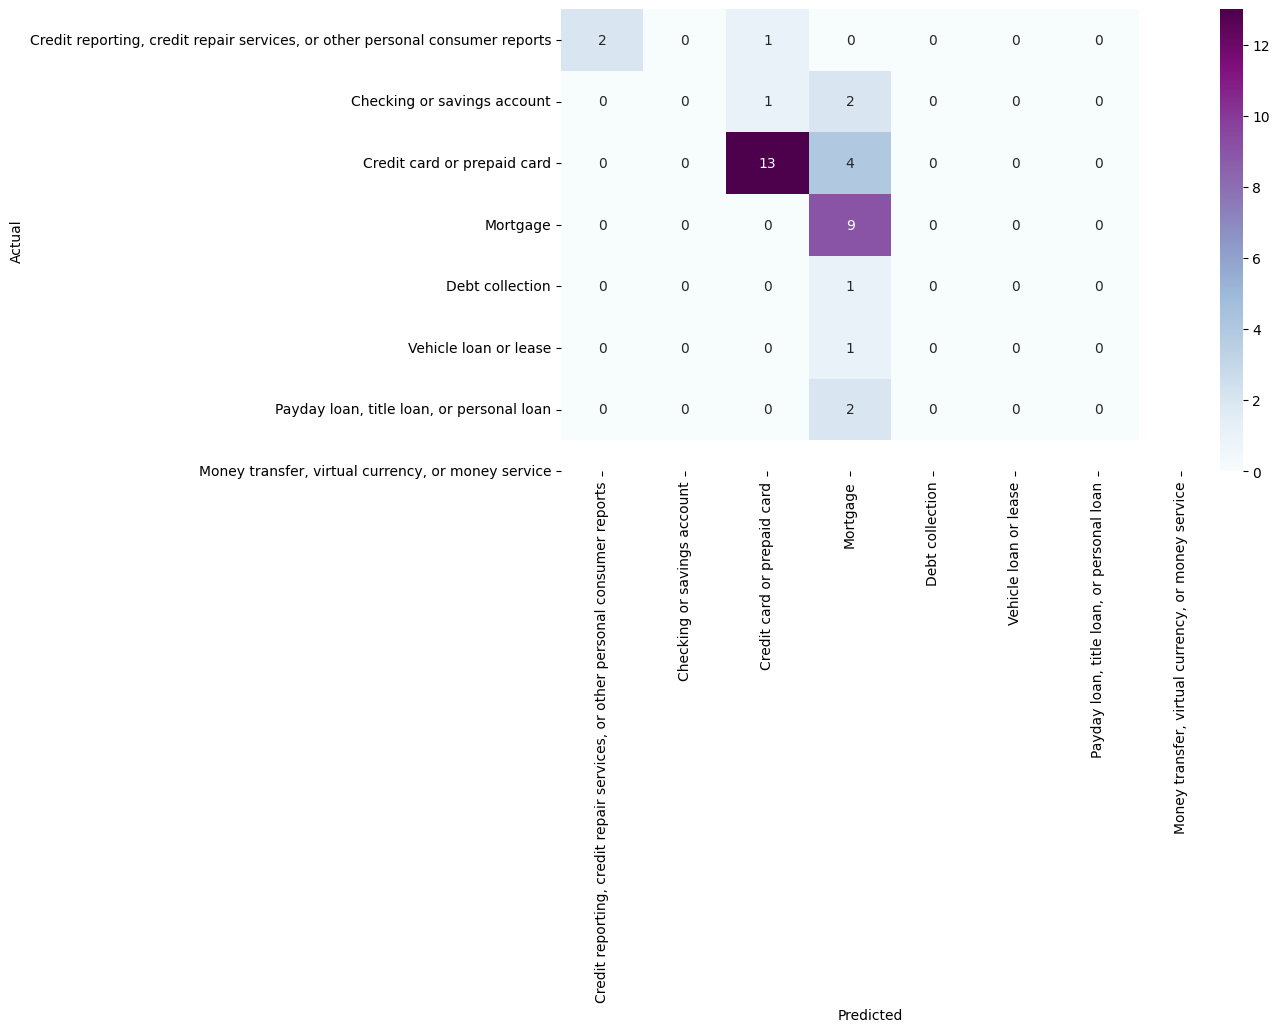

In [114]:
accuracy()
heat_conf()

In [115]:
y_score = model.decision_function(xvalid_tfidf)
print(y_score[:15,:])
predictions = model.predict(xvalid_tfidf)
print(predictions[:15])

[[ 0.72823277 -0.36642188  2.6336533   1.47410236 -0.82429184 -0.34864987
  -1.45058363 -1.84604121]
 [ 0.74661715 -0.28332805  1.23084584  2.51702465 -0.62583998 -0.22529989
  -1.60676939 -1.75325034]
 [ 0.85700847 -0.08132939  1.67689908  1.7327064  -0.86651171 -0.14442798
  -1.49835402 -1.67599084]
 [ 0.32769959 -0.64381773  3.23428339  1.48252001 -0.91380498 -0.24494289
  -1.44337138 -1.79856601]
 [ 0.99894054 -0.27491183  1.12196255  1.58707191 -0.95741623  0.32842008
  -1.2830392  -1.52102782]
 [ 0.92159862  0.06533654  1.61170411  1.59044264 -0.91418208 -0.13434492
  -1.48332459 -1.65723032]
 [ 0.65355497 -0.73191133  1.96096849  2.74605739 -1.05535426 -0.33241982
  -1.3886873  -1.85220815]
 [ 0.56867492 -0.33568051  1.81786947  2.28361    -0.89044386 -0.27800694
  -1.35817697 -1.80784611]
 [ 0.71534241 -0.19904037  2.24183741  1.78073298 -0.92248676 -0.34652202
  -1.43647108 -1.83339257]
 [ 0.57737903 -0.50526158  1.72781051  2.56674207 -0.85625683 -0.17373941
  -1.53792838 -1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


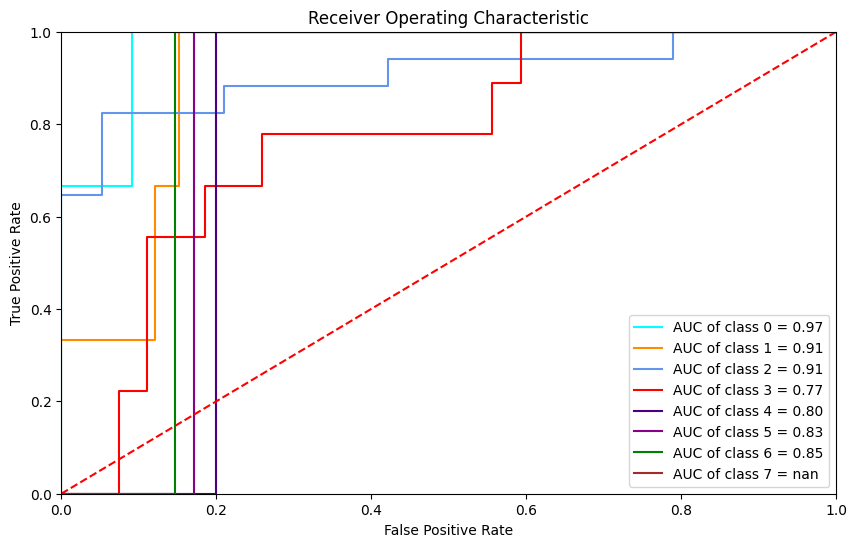

In [116]:
plot_auc(y, colours)    # in place of probabilities we can put y_score of decision function as well. will get a same result.

In [117]:
texts = ['This account popped up on my credit and it is not mines. I have filled out all the correct docs to show that i am victim of identity thief and will attach the ftc report with this complaint. Please block and remove this from my credit please XXXX XXXX XXXX Account Number: XXXX XXXX / 2019']
text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
# print(predictions)
print(texts)
print("   -Predicted as: {}".format(category_to_id[predictions[0]]))

['This account popped up on my credit and it is not mines. I have filled out all the correct docs to show that i am victim of identity thief and will attach the ftc report with this complaint. Please block and remove this from my credit please XXXX XXXX XXXX Account Number: XXXX XXXX / 2019']
   -Predicted as: Credit card or prepaid card


#CROSS VALIDATE MODEL

In [120]:
#Labels = Labels.reshape(Labels.shape[0])
# Binarize the output
#Labels = preprocessing.label_binarize(Labels, classes=[0,1,2,3,4,5,6,7,8,9,10])
#Labels = np.array(Labels)
print(Labels1)


scoring = ['precision_macro','recall_macro']
logistic_mod = linear_model.LogisticRegression(C = 1.0, class_weight = {4:3.0, 0:3, 6:3.0, 3:20}) 
scores = ms.cross_validate(logistic_mod, Features, Labels1, scoring=scoring,
                        cv=10, return_train_score=False)

[2 0 1 5 2 2 2 2 2 2 2 2 3 2 2 2 3 7 0 1 0 2 2 2 2 2 2 3 2 3 6 1 1 3 3 2 2
 2 2 2 2 0 3 2 2 2 3 0 1 5 3 2 3 3 4 1 2 5 5 2 3 5 1 5 2 0 2 2 2 2 1 3 2 7
 5 2 2 2 2 0 2 2 3 2 2 2 0 0 2 3 2 2 2 7 2 2 1 0 0 3 0 5 2 0 5 2 3 2 0 5 2
 2 2 3 2 1 1 0 2 6 2 3 3 3 4 2 2 3 2 2 2 7 0 2 2 2 2 5 1 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

In [121]:
def print_format(f,x,y):
    print('Fold %2d    %4.3f        %4.3f' % (f, x, y))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall')
    [print_format(f,x,y) for f,x,y in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'])]
                                              
    print('-' * 30)
    print('Mean       %4.3f        %4.3f '%
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro'])))  
    print('Std        %4.3f        %4.3f '%
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro'])))

print_cv(scores)  

         Precision     Recall
Fold  1    0.200        0.250
Fold  2    0.467        0.414
Fold  3    0.475        0.443
Fold  4    0.375        0.369
Fold  5    0.367        0.321
Fold  6    0.353        0.369
Fold  7    0.132        0.179
Fold  8    0.200        0.262
Fold  9    0.367        0.405
Fold 10    0.181        0.286
------------------------------
Mean       0.312        0.330 
Std        0.117        0.080 


In [122]:
nr.seed(456)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(645)
outside = ms.KFold(n_splits=10, shuffle = True)

In [123]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"estimator__C": [0.1, 1, 10, 100, 1000]}
## Define the logistic regression model
logistic_mod = linear_model.LogisticRegression() 

clf_log = multiclass.OneVsRestClassifier(logistic_mod)
## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = clf_log, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)

In [124]:
## Fit thhe cross validated grid search over the data 
Labels = preprocessing.label_binarize(Labels1, classes=[0,1,2,3,4,5,6,7,8,9,10])
print(Labels)
clf.fit(Features, Labels)
keys = list(clf.cv_results_.keys())
print(keys)
for key in keys[6:16]:
    print(clf.cv_results_[key])

[[0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_estimator__C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score']
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]
[nan nan nan nan nan]


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages

In [125]:
## And print the best parameter value
clf.best_params_

{'estimator__C': 0.1}

[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
Performance metrics by parameter
Parameter   Mean performance   STD performance
    0.10           nan               nan
    1.00           nan               nan
   10.00           nan               nan
  100.00           nan               nan
 1000.00           nan               nan


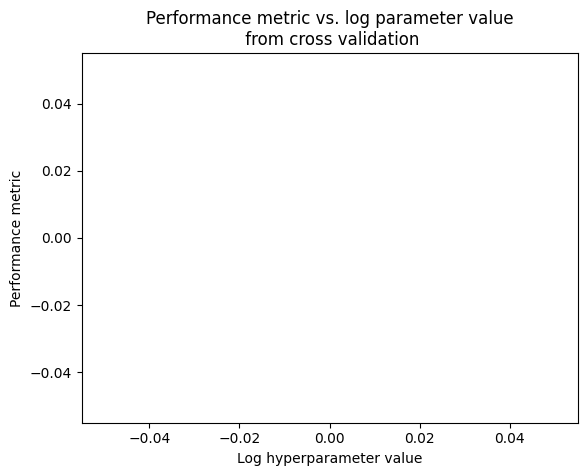

In [126]:
import math
def plot_cv(clf, params_grid, param = 'estimator__C'):
    params = [x for x in params_grid[param]]
  
    keys = list(clf.cv_results_.keys())              
    grid = np.array([clf.cv_results_[key] for key in keys[6:16]])
    print(grid)
    means = np.mean(grid, axis = 0)
    stds = np.std(grid, axis = 0)
    print('Performance metrics by parameter')
    print('Parameter   Mean performance   STD performance')
    for x,y,z in zip(params, means, stds):
        print('%8.2f        %6.5f            %6.5f' % (x,y,z))
    
    params = [math.log10(x) for x in params]
    
#     print(params*grid.shape[0])
    plt.scatter(params * grid.shape[0], grid.flatten())
    p = plt.scatter(params, means, color = 'red', marker = '+', s = 300)
    plt.plot(params, np.transpose(grid))
    plt.title('Performance metric vs. log parameter value\n from cross validation')
    plt.xlabel('Log hyperparameter value')
    plt.ylabel('Performance metric')
    
plot_cv(clf, param_grid)    

In [127]:
nr.seed(498)
cv_estimate = cross_val_score(clf, Features, Labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Streaming output truncated to the last 5000 lines.
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 118, in _average_binary_score
    score[c] = binary_metric(y_true_c, y_score_c, sample_weight=score_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 339, in _binary_roc_auc_score
    raise ValueError(
ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/m

Mean performance metric =  nan
SDT of the metric       =  nan
Outcomes by cv fold
Fold  1     nan
Fold  2     nan
Fold  3     nan
Fold  4     nan
Fold  5     nan
Fold  6     nan
Fold  7     nan
Fold  8     nan
Fold  9     nan
Fold 10     nan


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages

Accuracy:  0.5277777777777778
[[ 2  0  0  0  0  1  0]
 [ 1  0  1  1  0  0  0]
 [ 0  0 13  3  0  1  0]
 [ 1  0  4  4  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  1  1  0  0  0]]


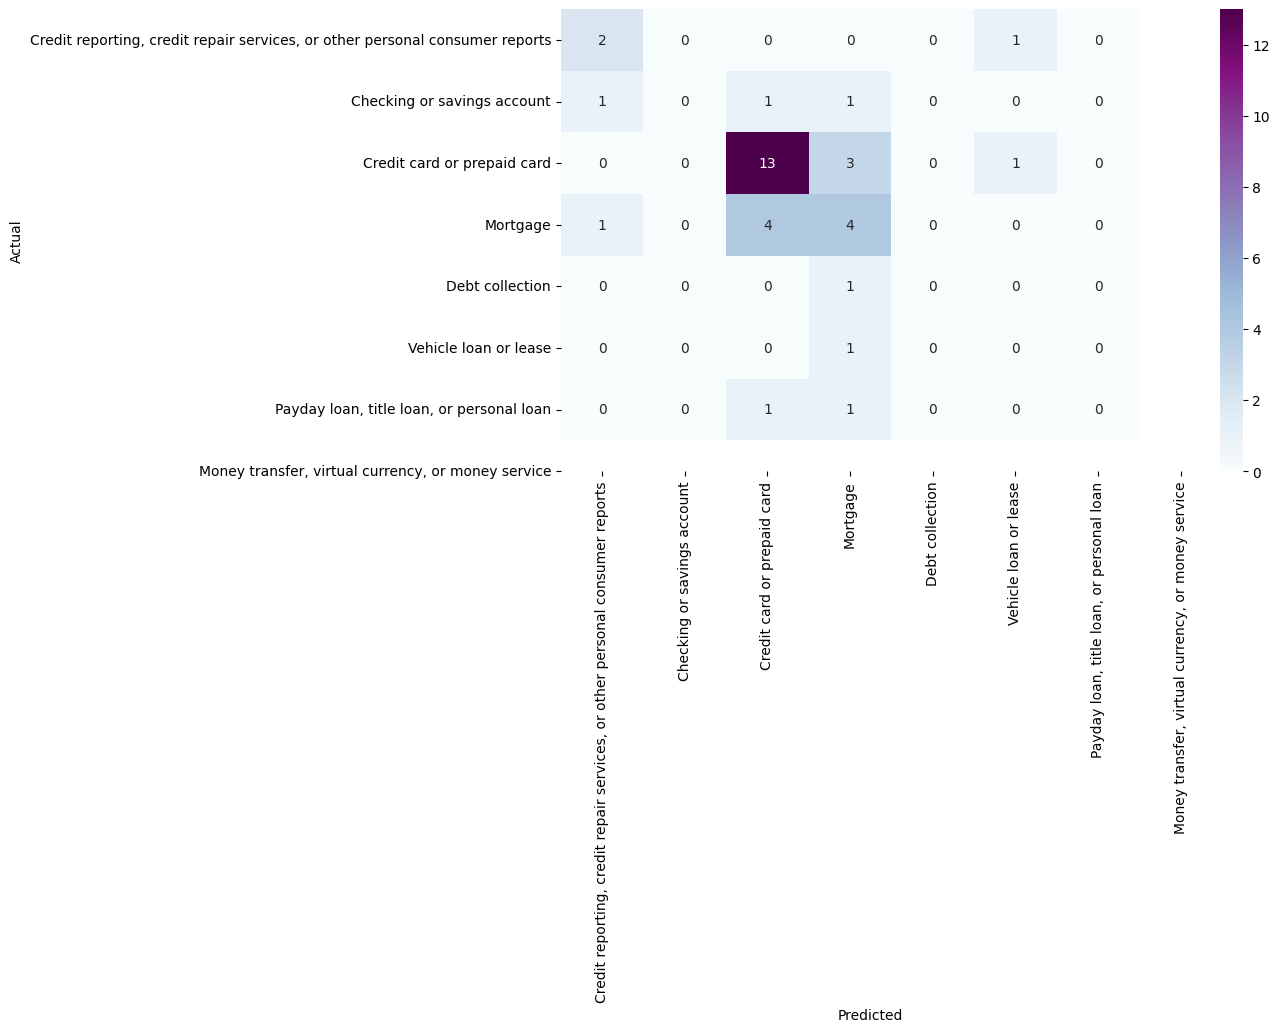

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


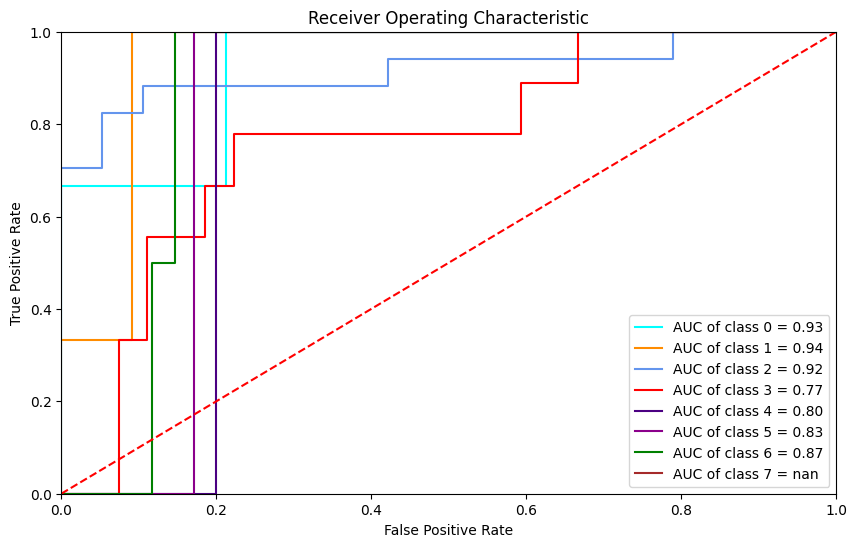

In [130]:
model = linear_model.LogisticRegression(C=10, class_weight = {4:3.0, 0:3, 6:3.0, 3:20}).fit(xtrain_tfidf, train_y)
accuracy()
heat_conf()
y_score = model.decision_function(xvalid_tfidf)
# print(y_score[:15,:])
predictions = model.predict(xvalid_tfidf)
# print(predictions[:15])
    
plot_auc(y,colours) 

In [131]:
import pickle
# open a file where you want to store the data
file = open('customer_classification_model_lr.pkl','wb')
# Dump information to that file
pickle.dump(model, file)

#Support Vector machine model
Nested cross validation is used to estimate the optimal hyperparameters and perform model selection for the nonlinear SVM model. 5 fold cross validation is used since training SVMs are computationally intensive to train. Additional folds would give better estimates but at the cost of greater computation time. Execute the code in the cell below to define inside and outside fold objects.

In [132]:
nr.seed(248)
inside = ms.KFold(n_splits=5, shuffle = True)
nr.seed(135)
outside = ms.KFold(n_splits=5, shuffle = True)

In [133]:
Labels = preprocessing.label_binarize(Labels1, classes=[0,1,2,3,4,5,6,7,8,9,10])
print(Labels)

[[0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [134]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"estimator__C": [1, 10, 100, 1000]}
## Define the SVM model
svc_clf = svm.LinearSVC() 

svc_multi_clf = multiclass.OneVsRestClassifier(svc_clf)
## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_multi_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/py

{'estimator__C': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(


[[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [ 1.  1.  1.  1.]
 [nan nan nan nan]
 [nan nan nan nan]]
Performance metrics by parameter
Parameter   Mean performance   STD performance
    1.00           nan               nan
   10.00           nan               nan
  100.00           nan               nan
 1000.00           nan               nan


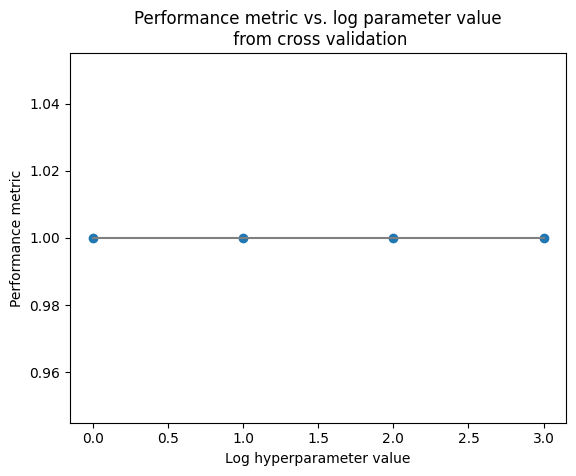

In [135]:
plot_cv(clf, param_grid)  

In [136]:
cv_estimate = cross_val_score(clf, Features, Labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages

Mean performance metric =  nan
SDT of the metric       =  nan
Outcomes by cv fold
Fold  1     nan
Fold  2     nan
Fold  3     nan
Fold  4     nan
Fold  5     nan


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 8 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages

In [138]:
model = svm.LinearSVC(class_weight={4:3.0, 0:3, 6:3.0, 3:20}).fit(xtrain_tfidf, train_y)

Accuracy:  0.5555555555555556
[[ 2  0  0  0  0  1  0]
 [ 1  0  2  0  0  0  0]
 [ 0  0 16  0  0  1  0]
 [ 1  0  6  2  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  1  1  0  0  0]]


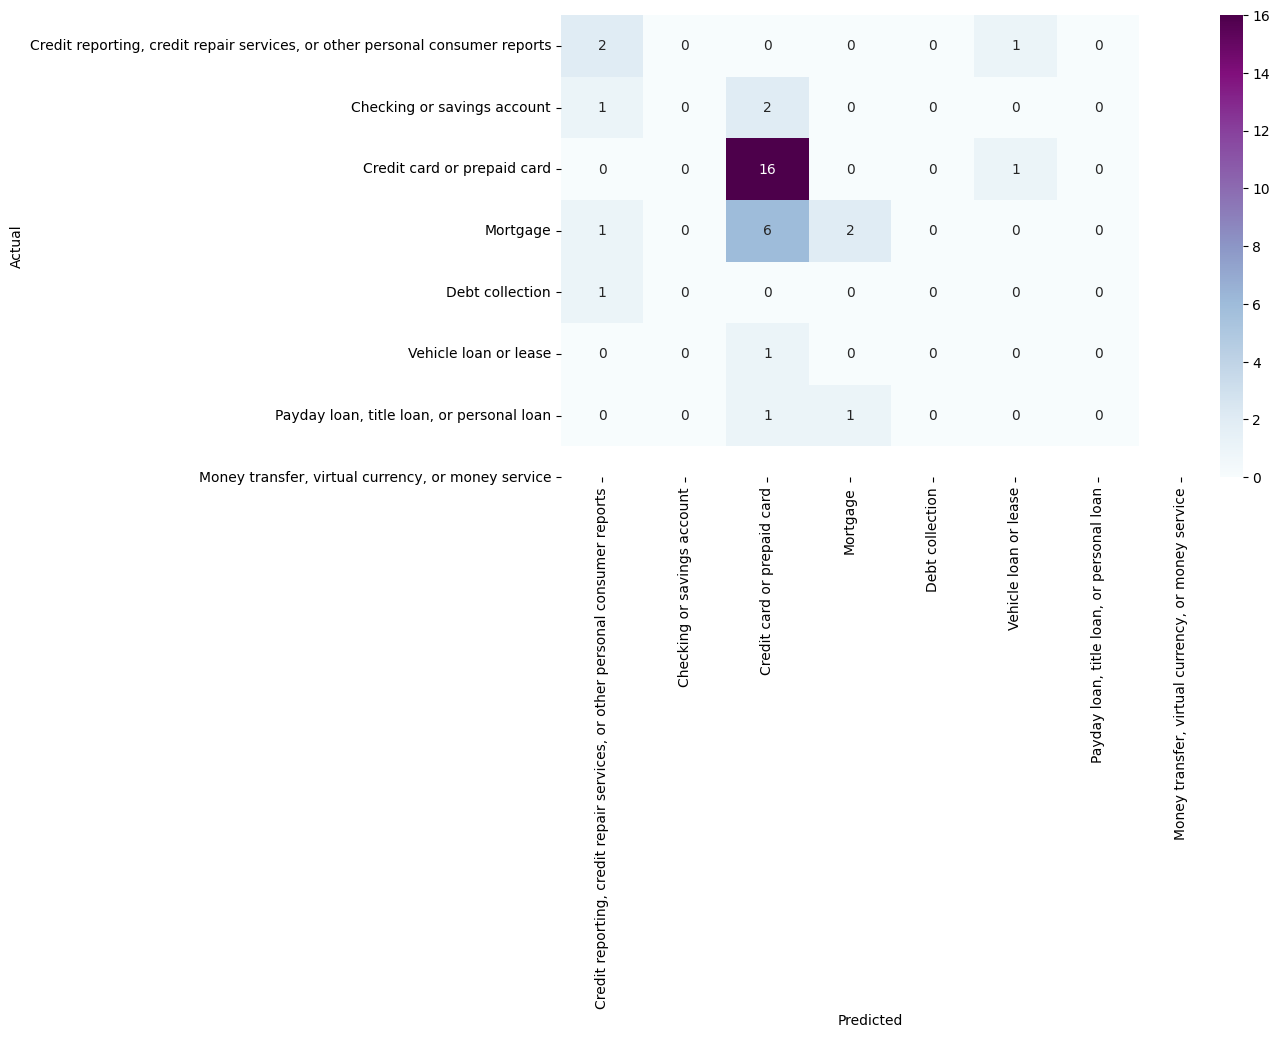

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


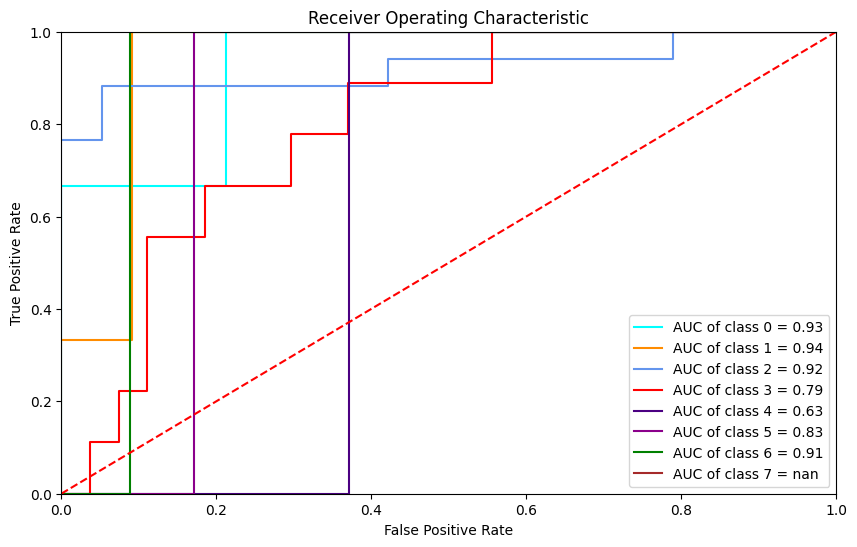

In [139]:
accuracy()
heat_conf()
y_score = model.decision_function(xvalid_tfidf)
# print(y_score[:15,:])
predictions = model.predict(xvalid_tfidf)
# print(predictions[:15])
    
plot_auc(y,colours) 

In [140]:
import pickle
# open a file where you want to store the data
file = open('customer_classification_model_svm.pkl','wb')
# Dump information to that file
pickle.dump(model, file)